In [1]:
import tensorflow_hub as hub

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as pl
import matplotlib.image as mpimg

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import matplotlib as mp
import matplotlib.pylab as pt
from matplotlib import font_manager

In [4]:
md = tf.keras.Sequential([  # 층 추가 후 모델 생성
    
    hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/4",
                   input_shape = (224, 224, 3),
                   trainable = False),
                   tf.keras.layers.Dense(2, activation = 'softmax')
])

In [5]:
md.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              58331648  
                                                                 
 dense (Dense)               (None, 2)                 4098      
                                                                 
Total params: 58,335,746
Trainable params: 4,098
Non-trainable params: 58,331,648
_________________________________________________________________


In [6]:
# from google.colab import files # 데이터 불러오기
# file_uploaded=files.upload()   

# #시간이 오래 걸리면 구글 드라이브에서 불러오기로 변경해서 진행해주세요.
# #from google.colab import drive 
# #drive.mount('/content/drive/') 

# #chap5 > data 폴더에 있는 catanddog.zip 파일을 선택합니다.
# train_dir = "catanddog.zip"
# !unzip catanddog.zip               #압축 풀기

In [7]:
batch = 32
img_h = 224
img_w = 224
train = "drive/MyDrive/catanddog/train/"
valid = "drive/MyDrive/catanddog/validation/"

tr = ImageDataGenerator(
                    rescale = 1./255,                # 정규화
                    rotation_range = 10,            # 회전, 기울기 (0 ~ 10도 사이에서 회전)
                    width_shift_range = 0.1,        # 수평으로 랜덤하게 평행이동
                    height_shift_range = 0.1,       # 수직으로 랜덤하게 평행이동
                    shear_range = 0.1,              # 0.1 라디안 내외로 시계 반대 방향으로 이미지를 변환
                    zoom_range = 0.1                # 0.1 만큼 확대
)

tr_generator = tr.flow_from_directory(
                    train,                          # 훈련 이미지 경로
                    target_size = (img_h, img_w),   # 이미지 크기 설정
                    color_mode = "rgb",             # 흑백 혹은 컬러
                    batch_size = batch,             # 배치당 generator에서 생성할 이미지 개수
                    seed = 7,                       # 임의의 난수 설정값
                    shuffle = True,                 # 이미지를 섞어서 사용
                    class_mode = "categorical")     # 예측할 클래스가 두개라면 binary 그렇지 않으면 categorical

vl = ImageDataGenerator( rescale = 1.0/255.0 )

vl_generator = vl.flow_from_directory(
                    valid,                          # 검정 이미지 경로
                    target_size = (img_h, img_w),   # 이미지 크기 설정
                    color_mode = "rgb",             # 흑백 혹은 컬러
                    batch_size = batch,             # 배치당 generator에서 생성할 이미지 개수
                    seed = 7,                       # 임의의 난수 설정값
                    shuffle = True,                 # 이미지를 섞어서 사용
                    class_mode = "categorical")     # 예측할 클래스가 두개라면 binary 그렇지 않으면 categorical

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [8]:
md.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

In [9]:
hist = md.fit(tr_generator, epochs = 10, validation_data = vl_generator, verbose = 1)

Epoch 1/10
13/13 [==============================] - 138s 10s/step - loss: 0.4657 - accuracy: 0.8130 - val_loss: 0.1607 - val_accuracy: 0.9796
Epoch 2/10
13/13 [==============================] - 7s 555ms/step - loss: 0.1183 - accuracy: 0.9766 - val_loss: 0.0885 - val_accuracy: 0.9592
Epoch 3/10
13/13 [==============================] - 7s 557ms/step - loss: 0.0674 - accuracy: 0.9818 - val_loss: 0.0726 - val_accuracy: 0.9592
Epoch 4/10
13/13 [==============================] - 9s 655ms/step - loss: 0.0571 - accuracy: 0.9896 - val_loss: 0.0585 - val_accuracy: 0.9796
Epoch 5/10
13/13 [==============================] - 7s 551ms/step - loss: 0.0401 - accuracy: 0.9870 - val_loss: 0.0552 - val_accuracy: 0.9796
Epoch 6/10
13/13 [==============================] - 7s 559ms/step - loss: 0.0320 - accuracy: 0.9974 - val_loss: 0.0541 - val_accuracy: 0.9796
Epoch 7/10
13/13 [==============================] - 7s 552ms/step - loss: 0.0272 - accuracy: 0.9974 - val_loss: 0.0506 - val_accuracy: 0.9796
Epoch 

Text(0.5, 1.0, 'loss')

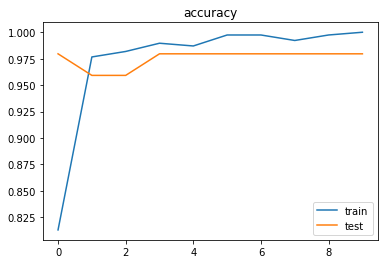

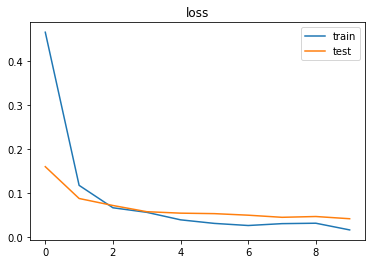

In [10]:
accuracy = hist.history['accuracy']         # 그래프 그리기
val_accuracy = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(accuracy))

pt.plot(epochs, accuracy, label="train")
pt.plot(epochs, val_accuracy, label="test")
pt.legend()
pt.title('accuracy')
pt.figure()

pt.plot(epochs, loss, label="train")
pt.plot(epochs, val_loss, label="test")
pt.legend()
pt.title('loss')

1/1 [==============================] - 2s 2s/step


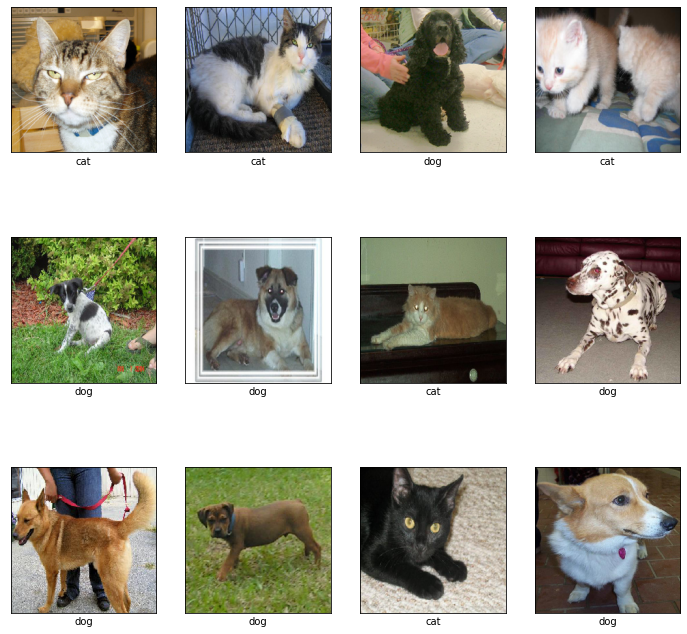

In [11]:
cn = ['cat', 'dog']                          # 클래스 이름
valid, lbl_batch = next(iter(vl_generator))  # 반복자 iter과 반복 next 메서드 적용 => 반복(반복자(리스트 반환 가능 객체))
pred = md.predict(valid)                     # 예측값 추출
pred = np.argmax(pred, axis = 1)             # argmax -> 최대값의 인덱스 번호

fig = pt.figure(figsize = (12,12))

for i in range(12):
    
    pt.subplot(3, 4, i+1)
    pt.imshow(valid[i])
    pt.xticks(ticks = [])
    pt.yticks(ticks = [])
    
    pt.xlabel(cn[pred[i]])